In [6]:
#!pip install numpy
#!pip install pandas
import numpy as np
import pandas as pd


In [8]:
df= pd.read_csv("C:/Users/vdeleon/Anaconda3/envs/tripadvisor2/tripadvisor2/puerto_escondido_hotels.csv")

In [10]:
df.head()

,rating,review
0,50,"In the Hotel the had a good room service, the ..."
1,40,We spent a night here at this hotel when we fi...
2,40,Our room was clean and only a short walk to th...
3,10,Booked for 8 nights but stayed one( only becau...
4,20,This is the loudest hotel I’ve ever stayed at....


In [11]:
df.shape

(4824, 2)

In [12]:
df.isnull().sum()

rating    0
review    0
dtype: int64

In [13]:
df.isnull().sum().sort_values(ascending=False)

rating    0
review    0
dtype: int64

In [ ]:
#df.dropna(inplace=True)

In [14]:
df["rating"].value_counts()

50    3507
40     780
30     245
10     151
20     141
Name: rating, dtype: int64

In [15]:
df[df["rating"] != 30]

,rating,review
0,50,"In the Hotel the had a good room service, the ..."
1,40,We spent a night here at this hotel when we fi...
2,40,Our room was clean and only a short walk to th...
3,10,Booked for 8 nights but stayed one( only becau...
4,20,This is the loudest hotel I’ve ever stayed at....
...,...,...
4819,50,Hi guys I was in Mexico for four weeks and Qui...
4820,50,A wonderful place to rest and relax. Great loc...
4821,50,I Spent a week at Quinta Lili It is perfect fo...
4822,50,Quinta Lili is by far the best place to stay i...


In [16]:
df = df[df["rating"] != 30]

In [17]:
df.shape

(4579, 2)

In [18]:
df["rating"].value_counts()

50    3507
40     780
10     151
20     141
Name: rating, dtype: int64

In [19]:
df["Positively Rated"]= np.where(df["rating"]>30, 1, 0)

In [20]:
df.shape

(4579, 3)

In [21]:
df.head()

,rating,review,Positively Rated
0,50,"In the Hotel the had a good room service, the ...",1
1,40,We spent a night here at this hotel when we fi...,1
2,40,Our room was clean and only a short walk to th...,1
3,10,Booked for 8 nights but stayed one( only becau...,0
4,20,This is the loudest hotel I’ve ever stayed at....,0


In [22]:
df["Positively Rated"].value_counts()

1    4287
0     292
Name: Positively Rated, dtype: int64

In [25]:
#!pip install seaborn
import seaborn as sns

C:\Users\vdeleon\Anaconda3\envs\trip\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Positively Rated', ylabel='count'>

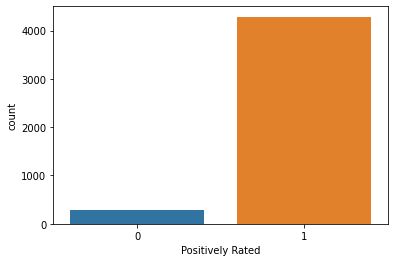

In [26]:
sns.countplot(df["Positively Rated"])

In [29]:
#! pip install sklearn
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df["review"],df["Positively Rated"],random_state=50)

In [31]:
print(X_train)

2395    La coral ist eine Perle, einfache Unterkunft  ...
3862    Just wanted to give a mad shoutout to all the ...
3974    The hotel is really charming (kind of colonial...
2722    We stayed in this hostel for 4 night in a priv...
255     I stayed at this hotel for 4 nights after leav...
                              ...                        
3545    A very sweet spot. A cool little hotel, villa ...
83      This is a quiet hotel with attractive and comf...
149     amazing. you must go! It was the best! I cant ...
2164    Adelina her husband and the team at Villa Lili...
2078    This room, and the owner Aide, saved my trip f...
Name: review, Length: 3434, dtype: object


In [34]:
X_train

2395    La coral ist eine Perle, einfache Unterkunft  ...
3862    Just wanted to give a mad shoutout to all the ...
3974    The hotel is really charming (kind of colonial...
2722    We stayed in this hostel for 4 night in a priv...
255     I stayed at this hotel for 4 nights after leav...
                              ...                        
3545    A very sweet spot. A cool little hotel, villa ...
83      This is a quiet hotel with attractive and comf...
149     amazing. you must go! It was the best! I cant ...
2164    Adelina her husband and the team at Villa Lili...
2078    This room, and the owner Aide, saved my trip f...
Name: review, Length: 3434, dtype: object

In [35]:
X_train[1]

"We spent a night here at this hotel when we first pulled in to town.... it was adequate for our purposes.... the internet wifi worked just outside our room door.  The staff were friendly and helpful even though we didn't speak Spanish."

In [40]:
#! pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vect=CountVectorizer(min_df=5,ngram_range=(1,2)).fit(X_train)

In [45]:
len(vect.get_feature_names_out())

12715

In [46]:
X_train_vectorized=vect.transform(X_train)

In [49]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\vdeleon\Anaconda3\envs\trip\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
#Save predictions
predictions= model.predict(vect.transform(X_test))

In [51]:
print(predictions)

[1 1 1 ... 1 1 1]


In [53]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
#AUC
from sklearn.metrics import roc_auc_score
print("AUC score is ", roc_auc_score(y_test,predictions) )

AUC score is  0.7775524049511257


In [55]:
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()

In [57]:
print("Negative words",feature_names[sorted_coef_index[:15]])

Negative words ['not' 'dirty' 'non' 'no' 'rude' 'over' 'money' 'ok' 'dan' 'however'
 'down' 'like' 'poor' 'didn' 'another']


In [58]:
print("Positive words",feature_names[sorted_coef_index[:-11:-1]])

Positive words ['great' 'best' 'clean' 'perfect' 'amazing' 'con' 'lovely' 'playa' 'es'
 'just']
